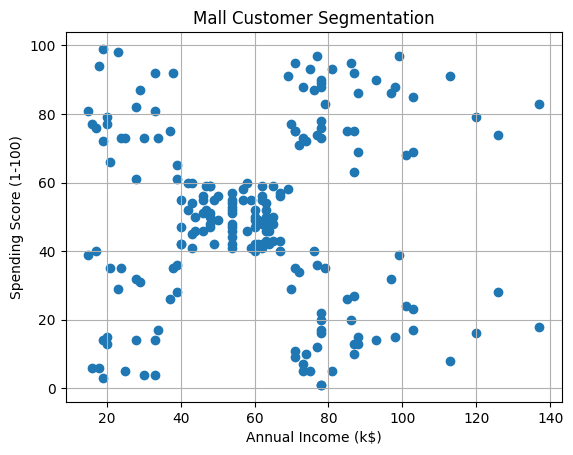

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv('Mall_customers.csv')

# Select the columns you want to use for the scatter plot, e.g., 'Annual Income (k$)' and 'Spending Score (1-100)'
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Plot the data
fig = plt.figure(0)
plt.grid(True)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Mall Customer Segmentation')
plt.show()


In [20]:
k = 3

clusters = {}
np.random.seed(23)

for idx in range(k):
    center = 2*(2*np.random.random((X.shape[1],))-1)
    points = []
    cluster = {
        'center' : center,
        'points' : []
    }
    
    clusters[idx] = cluster
    
clusters


{0: {'center': array([0.06919154, 1.78785042]), 'points': []},
 1: {'center': array([ 1.06183904, -0.87041662]), 'points': []},
 2: {'center': array([-1.11581855,  0.74488834]), 'points': []}}

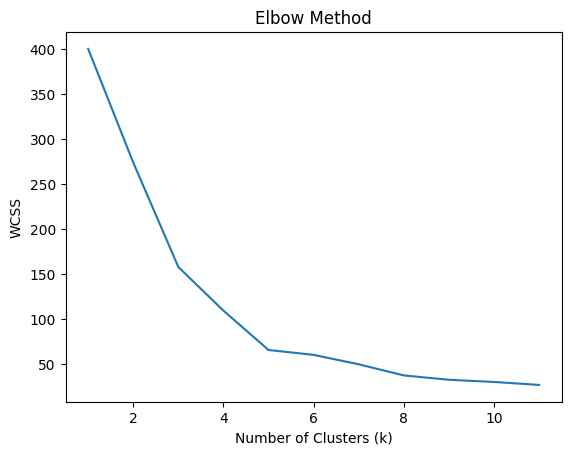

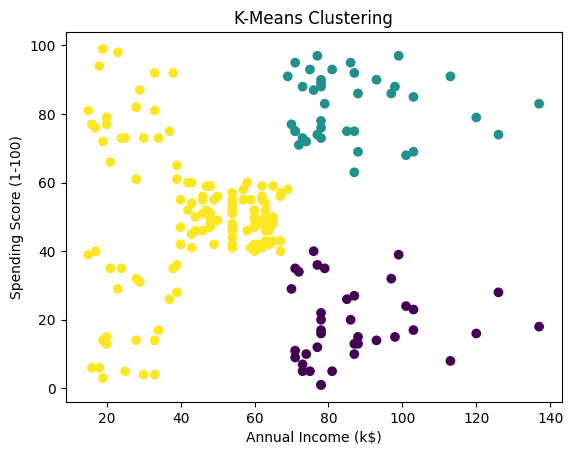

In [23]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('Mall_Customers.csv')  

# Select features for clustering (e.g., Annual Income and Spending Score)
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform k-means clustering for k = 1 to 11
wcss = []  # Within-cluster sum of squares
for i in range(1, 12):
    kmeans = KMeans(n_clusters=i, random_state=42) 
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.plot(range(1, 12), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()

# Choose the optimal k value (e.g., using the Elbow Method)
# Let's assume k = 5 based on the Elbow Method

# Apply k-means with the chosen k value
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Get cluster labels for each data point
labels = kmeans.labels_

# Add cluster labels to the original DataFrame
df['Cluster'] = labels

# Visualize the clusters (e.g., scatter plot)
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster'])
plt.title('K-Means Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

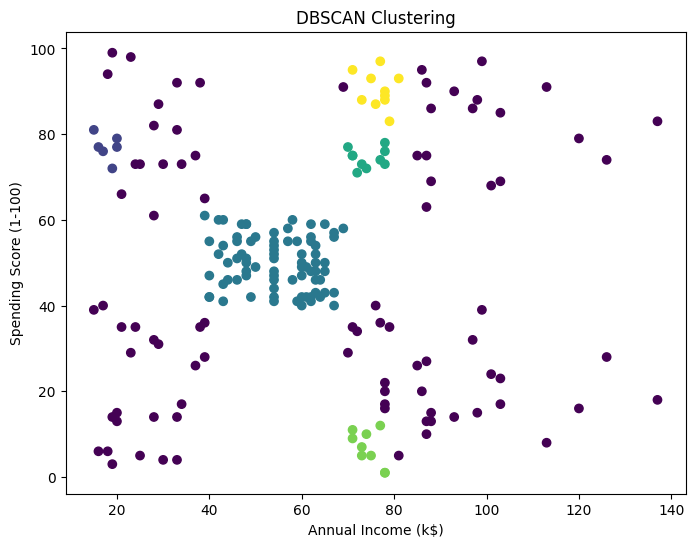

In [31]:
import pandas as pd
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('Mall_customers.csv')
X = data[['Annual Income (k$)', 'Spending Score (1-100)']].values

# Initialize DBSCAN with chosen parameters
dbscan = DBSCAN(eps=5, min_samples=5)
dbscan.fit(X)

# Get cluster labels
labels = dbscan.labels_

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('DBSCAN Clustering')
plt.show()


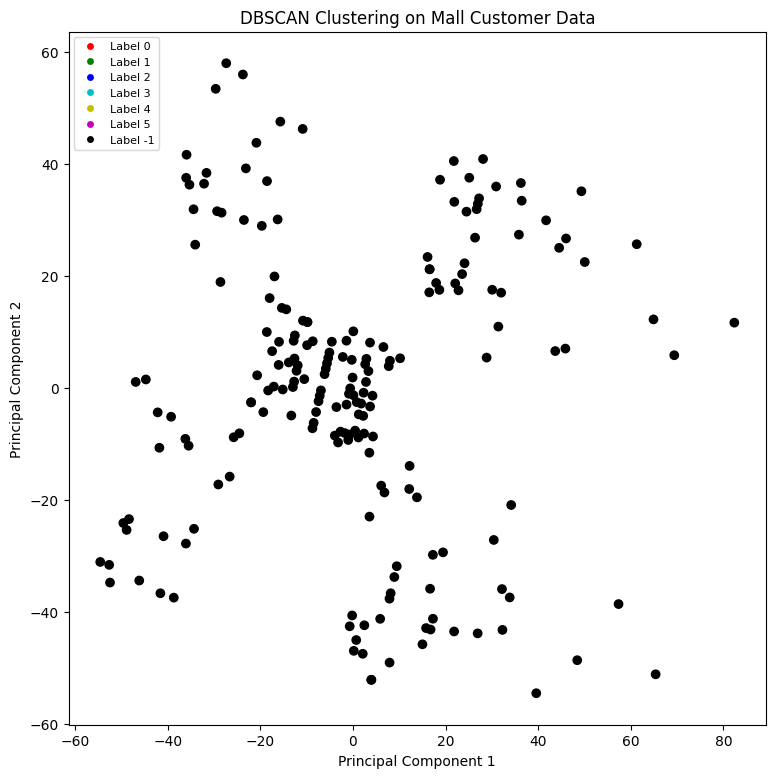

In [32]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Load and preprocess the data
data = pd.read_csv('Mall_customers.csv')
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Normalize and reduce dimensions with PCA
pca = PCA(n_components=2)
X_principal = pd.DataFrame(pca.fit_transform(X), columns=['P1', 'P2'])

# Apply DBSCAN
db = DBSCAN(eps=0.0375, min_samples=50).fit(X_principal)
labels = db.labels_

# Define colors for each cluster label
colors = {0: 'r', 1: 'g', 2: 'b', 3: 'c', 4: 'y', 5: 'm', -1: 'k'}
cvec = [colors[label] for label in labels]

# Plot clusters
plt.figure(figsize=(9, 9))
plt.scatter(X_principal['P1'], X_principal['P2'], c=cvec)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('DBSCAN Clustering on Mall Customer Data')
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=col, label=f'Label {label}')
    for label, col in colors.items()
], loc='upper left', fontsize=8)
plt.show()
